<a href="https://colab.research.google.com/github/Sowmya-Dadheech/Time_Series_Analysis/blob/main/TSA_EXP_8_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN**

In [ ]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from sklearn import metrics

In [ ]:
df = pd.read_excel('/content/India_Exchange_Rate_Dataset.xls')

In [ ]:
df.head()

,observation_date,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927


In [ ]:
def train_split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(0, len(sequence)-30):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)


def test_split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(len(sequence)-30, len(sequence)):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
raw_sequence = df['EXINUS']
steps = 30

X, y = train_split_sequence(raw_sequence, steps)

In [ ]:
print("**************************************")
print("The input to the CNN :\n", raw_sequence)
print("**************************************")
print("The features (X), lagged values of time series, for our CNN Model")
print(X)
print("**************************************")
print("The respective observed values (y) of sequence for training our CNN Model")
print(y)
print("**************************************")

**************************************
The input to the CNN :
 0       8.0041
1       7.7538
2       7.5465
3       7.5462
4       7.4927
        ...   
558    68.7391
559    71.1891
560    71.3110
561    71.0086
562    71.4942
Name: EXINUS, Length: 563, dtype: float64
**************************************
The features (X), lagged values of time series, for our CNN Model
[[ 8.0041  7.7538  7.5465 ...  7.8841  8.07    8.1914]
 [ 7.7538  7.5465  7.5462 ...  8.07    8.1914  8.4895]
 [ 7.5465  7.5462  7.4927 ...  8.1914  8.4895  8.7895]
 ...
 [65.8009 64.536  64.4195 ... 69.388  68.7391 71.1891]
 [64.536  64.4195 64.4482 ... 68.7391 71.1891 71.311 ]
 [64.4195 64.4482 64.424  ... 71.1891 71.311  71.0086]]
**************************************
The respective observed values (y) of sequence for training our CNN Model
[ 8.4895  8.7895  8.8648  8.8945  8.8994  8.9827  8.9471  8.9389  8.9648
  8.9918  9.0265  9.1109  8.9233  8.9755  9.0614  8.896   8.9658  8.8535
  8.9052  8.8626  8.8417  8.84

In [ ]:
features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

print("After reshaping, the shape of input X")
print(X.shape)
print("**************************************")
print("**************************************")
print("The final form of input feature matrix X is")
print(X)
print("**************************************")
print("**************************************")
print("Feature matrix X is ready for input to CNN model. We have used feature engineering to convert\n"
,"a sequence to matrix with image matrix shape to find patterns in sequence")
print("**************************************")
print("**************************************")

After reshaping, the shape of input X
(533, 30, 1)
**************************************
**************************************
The final form of input feature matrix X is
[[[ 8.0041]
  [ 7.7538]
  [ 7.5465]
  ...
  [ 7.8841]
  [ 8.07  ]
  [ 8.1914]]

 [[ 7.7538]
  [ 7.5465]
  [ 7.5462]
  ...
  [ 8.07  ]
  [ 8.1914]
  [ 8.4895]]

 [[ 7.5465]
  [ 7.5462]
  [ 7.4927]
  ...
  [ 8.1914]
  [ 8.4895]
  [ 8.7895]]

 ...

 [[65.8009]
  [64.536 ]
  [64.4195]
  ...
  [69.388 ]
  [68.7391]
  [71.1891]]

 [[64.536 ]
  [64.4195]
  [64.4482]
  ...
  [68.7391]
  [71.1891]
  [71.311 ]]

 [[64.4195]
  [64.4482]
  [64.424 ]
  ...
  [71.1891]
  [71.311 ]
  [71.0086]]]
**************************************
**************************************
Feature matrix X is ready for input to CNN model. We have used feature engineering to convert
 a sequence to matrix with image matrix shape to find patterns in sequence
**************************************
**************************************


In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 29, 64)            192       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 14, 64)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 896)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               89700     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 89993 (351.54 KB)
Trainable params: 89993 (351.54 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
17/17 [==============================] - 1s 5ms/step - loss: 243.5930
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 38.2437
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 10.3819
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 7.8438
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 6.6556
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 6.3135
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 6.1177
Epoch 8/50
17/17 [==============================] - 0s 6ms/step - loss: 5.8328
Epoch 9/50
17/17 [==============================] - 0s 5ms/step - loss: 5.6756
Epoch 10/50
17/17 [==============================] - 0s 5ms/step - loss: 5.6031
Epoch 11/50
17/17 [==============================] - 0s 5ms/step - loss: 5.4563
Epoch 12/50
17/17 [==============================] - 0s 6ms/step - loss: 5.0815
Epoch 13/50
17/17 [==========================

In [ ]:
x_test, y_test = train_split_sequence(raw_sequence, steps)

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], features))
y_pred = model.predict(x_test, verbose=0)

print(f"The next predicted output vs original is:")
data = pd.DataFrame(y_pred, columns=['y_pred'])
data["y_test"] = y_test
data.head()

The next predicted output vs original is:


,y_pred,y_test
0,8.602321,8.4895
1,8.629895,8.7895
2,8.780684,8.8648
3,8.925029,8.8945
4,9.077543,8.8994


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

2.307212999200101

In [ ]:
timeseries_evaluation_metrics_func(y_test, y_pred )

Evaluation metric results:-
MSE is : 2.307212999200101
MAE is : 1.0967422684689176
RMSE is : 1.5189512826947746
MAPE is : 114.9163091916451
R2 is : 0.9941176908941849



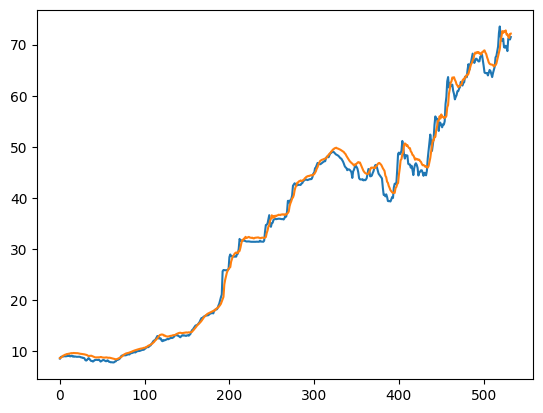

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Predicted')